In [1]:
from numpy import *
from scipy.sparse import *
from scipy.sparse.linalg import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [2]:
M=load_npz("reducedTargetT.npz")
M

<32195x31900 sparse matrix of type '<class 'numpy.int8'>'
	with 156621 stored elements in Compressed Sparse Row format>

In [3]:
P=load_npz("playlist_reduced.npz")
P=normalize(P)

In [4]:
kk=45
u, s, vt = svds(P.astype("float32"), k=kk)

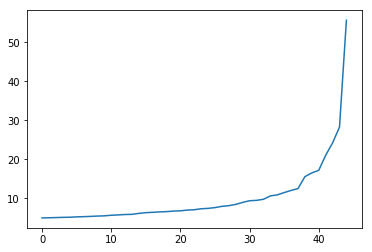

In [5]:
plt.plot(s)
plt.show()

In [6]:
newp_sparse = csr_matrix(dot(dot(u,diag(s)), vt))


In [ ]:
svdsimilarity = newp_sparse*M.T

In [ ]:
target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
playlists_with_tracks=load("playlists_with_tracks.npy")
target_tracks_ordered = load("targetTracksOrdered.npy")
def getsimil(pls, similrow):
    maxi = flip(argsort(similrow), axis=0)
    r = []
    for m in maxi:
        if(not isin(target_tracks_ordered[m], pls[1:])):
           r.append(target_tracks_ordered[m])
           if(len(r)==5):
               return r

In [21]:
fname = "SVDsimilarity"+str(kk)+".csv"

open(fname,"w").close()
print("playlist_id,track_ids",file=open(fname,"a"))
for pl, simil, i in zip(playlists_with_tracks, svdsimilarity, range(10000)):
    if(i%1000==0):
        print("computing "+str(i))
    s = str(int(pl[0]))
    s += ","
    r = getsimil(pl, ravel(simil.todense()))
    for el in r:
        s+=str(el)
        s+=" "
    print(s,file=open(fname,"a"))

computing 0
computing 1000
computing 2000
computing 3000
computing 4000
computing 5000
computing 6000
computing 7000
computing 8000
computing 9000
